In [3]:
# RAG Evaluation - Plotting and Visualization
# Load combined_results.csv and create comprehensive plots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# ============================================================================
# CELL 1: Load Data
# ============================================================================

df = pd.read_csv('/Users/santhosh/Documents/study_projects/ringcentral_assessment/evaluation/results_hybrid/combined_results.csv')
print(f"Loaded {len(df)} experiments")
print(f"\nColumns: {list(df.columns)}")
print(f"\nStrategies: {df['strategy'].unique()}")
print(f"Top-K values: {sorted(df['top_k'].unique())}")

# Create output directory for plots
Path('experiments/plots').mkdir(parents=True, exist_ok=True)



Loaded 8 experiments

Columns: ['strategy', 'top_k', 'search_type', 'threshold', 'hit_rate', 'avg_recall', 'avg_ndcg', 'mrr', 'map', 'avg_faithfulness', 'avg_key_facts_coverage', 'avg_answer_relevance', 'avg_context_recall', 'avg_answer_correctness', 'avg_latency_ms', 'min_latency_ms', 'max_latency_ms', 'p95_latency_ms', 'p99_latency_ms', 'estimated_cost_per_query', 'total_questions', 'source_file']

Strategies: ['basic_recursive' 'landingai_based' 'paragraph_based' 'semantic_based']
Top-K values: [np.int64(5), np.int64(15)]


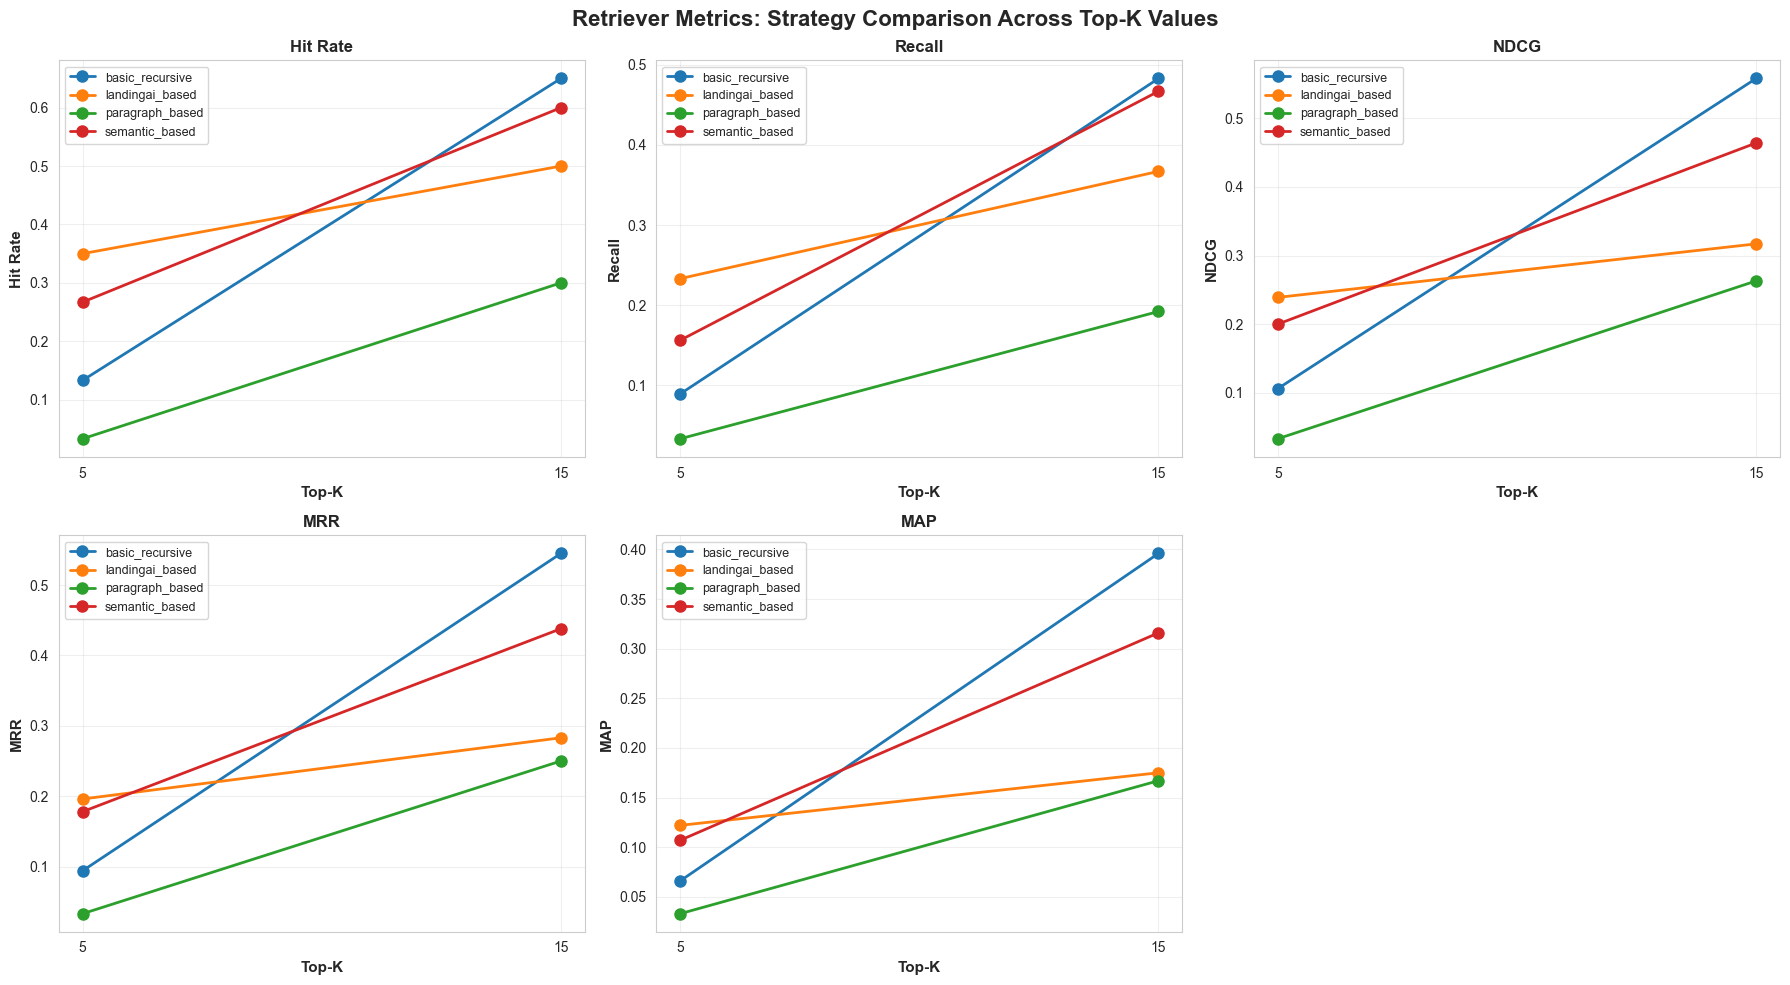

Saved: experiments/plots/retriever_metrics.png


In [4]:

# ============================================================================
# CELL 2: Plot 1 - Retriever Metrics by Strategy and Top-K
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Retriever Metrics: Strategy Comparison Across Top-K Values', 
             fontsize=16, fontweight='bold')

retriever_metrics = ['hit_rate', 'avg_recall', 'avg_ndcg', 'mrr', 'map']
metric_titles = ['Hit Rate', 'Recall', 'NDCG', 'MRR', 'MAP']

for idx, (metric, title) in enumerate(zip(retriever_metrics, metric_titles)):
    ax = axes[idx // 3, idx % 3]
    
    for strategy in df['strategy'].unique():
        strategy_data = df[df['strategy'] == strategy].sort_values('top_k')
        ax.plot(strategy_data['top_k'], strategy_data[metric], 
               marker='o', label=strategy, linewidth=2, markersize=8)
    
    ax.set_xlabel('Top-K', fontsize=11, fontweight='bold')
    ax.set_ylabel(title, fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(sorted(df['top_k'].unique()))

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
# plt.savefig('experiments/plots/retriever_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: experiments/plots/retriever_metrics.png")



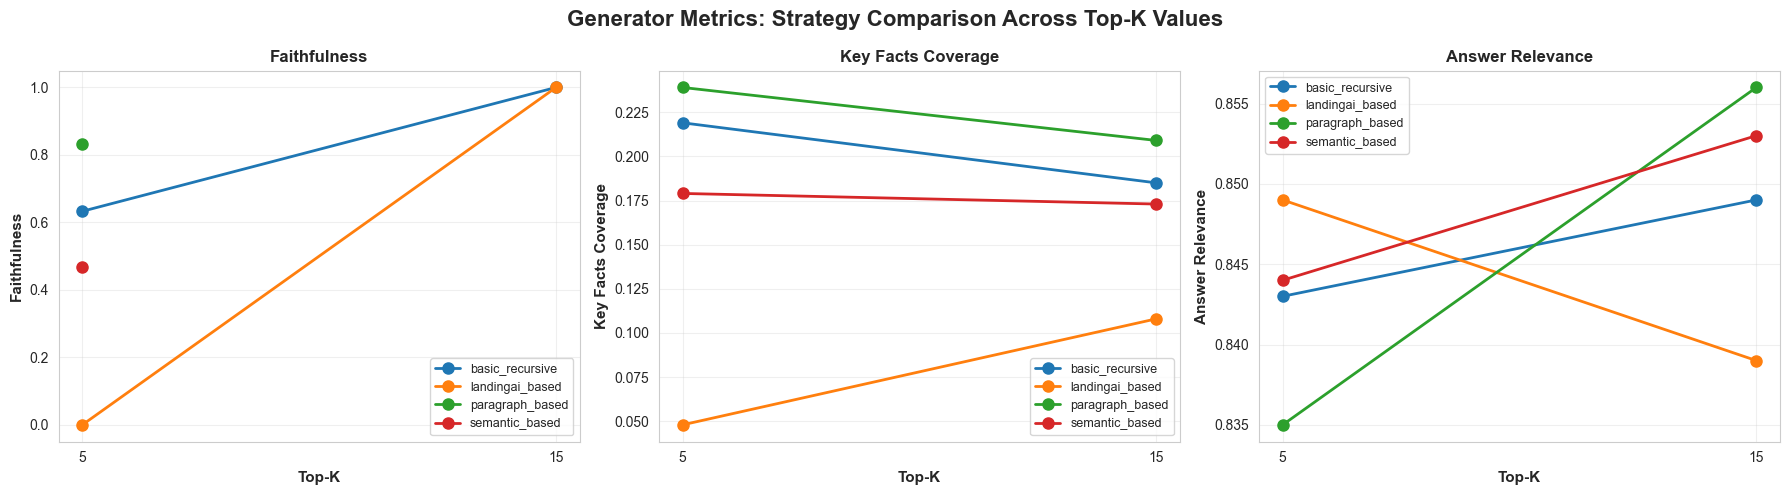

Saved: experiments/plots/generator_metrics.png


In [5]:

# ============================================================================
# CELL 3: Plot 2 - Generator Metrics by Strategy and Top-K
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Generator Metrics: Strategy Comparison Across Top-K Values', 
             fontsize=16, fontweight='bold')

generator_metrics = ['avg_faithfulness', 'avg_key_facts_coverage', 'avg_answer_relevance']
metric_titles = ['Faithfulness', 'Key Facts Coverage', 'Answer Relevance']

for idx, (metric, title) in enumerate(zip(generator_metrics, metric_titles)):
    ax = axes[idx]
    
    for strategy in df['strategy'].unique():
        strategy_data = df[df['strategy'] == strategy].sort_values('top_k')
        ax.plot(strategy_data['top_k'], strategy_data[metric], 
               marker='o', label=strategy, linewidth=2, markersize=8)
    
    ax.set_xlabel('Top-K', fontsize=11, fontweight='bold')
    ax.set_ylabel(title, fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(sorted(df['top_k'].unique()))

plt.tight_layout()
# plt.savefig('experiments/plots/generator_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: experiments/plots/generator_metrics.png")



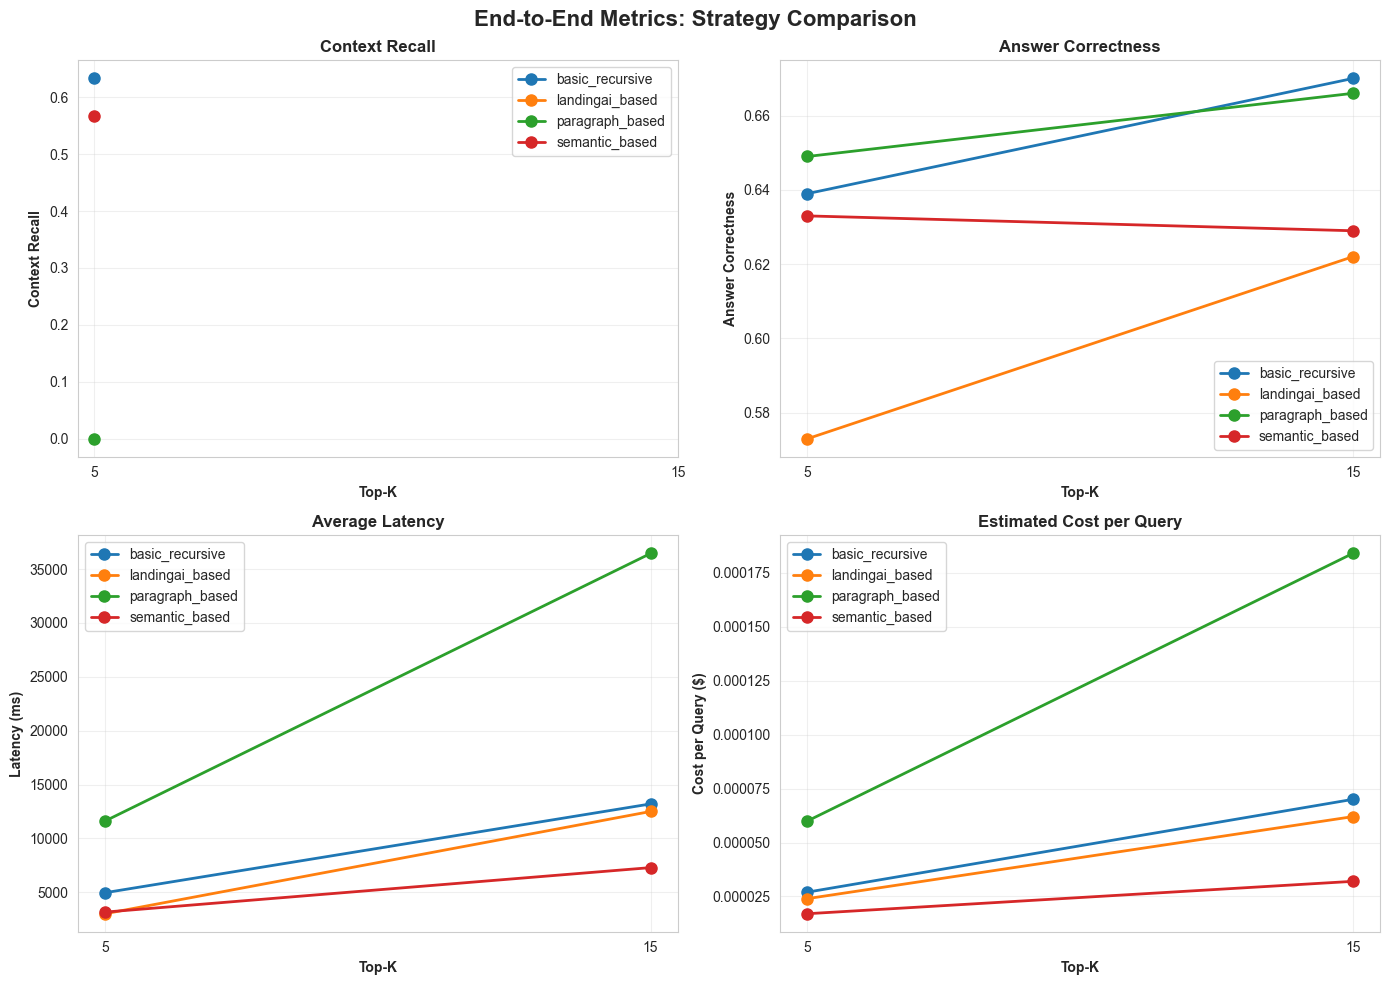

Saved: experiments/plots/end_to_end_metrics.png


In [6]:

# ============================================================================
# CELL 4: Plot 3 - End-to-End Metrics
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('End-to-End Metrics: Strategy Comparison', 
             fontsize=16, fontweight='bold')

# Context Recall
ax = axes[0, 0]
for strategy in df['strategy'].unique():
    strategy_data = df[df['strategy'] == strategy].sort_values('top_k')
    ax.plot(strategy_data['top_k'], strategy_data['avg_context_recall'], 
           marker='o', label=strategy, linewidth=2, markersize=8)
ax.set_xlabel('Top-K', fontweight='bold')
ax.set_ylabel('Context Recall', fontweight='bold')
ax.set_title('Context Recall', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['top_k'].unique()))

# Answer Correctness
ax = axes[0, 1]
for strategy in df['strategy'].unique():
    strategy_data = df[df['strategy'] == strategy].sort_values('top_k')
    ax.plot(strategy_data['top_k'], strategy_data['avg_answer_correctness'], 
           marker='o', label=strategy, linewidth=2, markersize=8)
ax.set_xlabel('Top-K', fontweight='bold')
ax.set_ylabel('Answer Correctness', fontweight='bold')
ax.set_title('Answer Correctness', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['top_k'].unique()))

# Average Latency
ax = axes[1, 0]
for strategy in df['strategy'].unique():
    strategy_data = df[df['strategy'] == strategy].sort_values('top_k')
    ax.plot(strategy_data['top_k'], strategy_data['avg_latency_ms'], 
           marker='o', label=strategy, linewidth=2, markersize=8)
ax.set_xlabel('Top-K', fontweight='bold')
ax.set_ylabel('Latency (ms)', fontweight='bold')
ax.set_title('Average Latency', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['top_k'].unique()))

# Cost per Query
ax = axes[1, 1]
for strategy in df['strategy'].unique():
    strategy_data = df[df['strategy'] == strategy].sort_values('top_k')
    ax.plot(strategy_data['top_k'], strategy_data['estimated_cost_per_query'], 
           marker='o', label=strategy, linewidth=2, markersize=8)
ax.set_xlabel('Top-K', fontweight='bold')
ax.set_ylabel('Cost per Query ($)', fontweight='bold')
ax.set_title('Estimated Cost per Query', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['top_k'].unique()))

plt.tight_layout()
# plt.savefig('experiments/plots/end_to_end_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: experiments/plots/end_to_end_metrics.png")


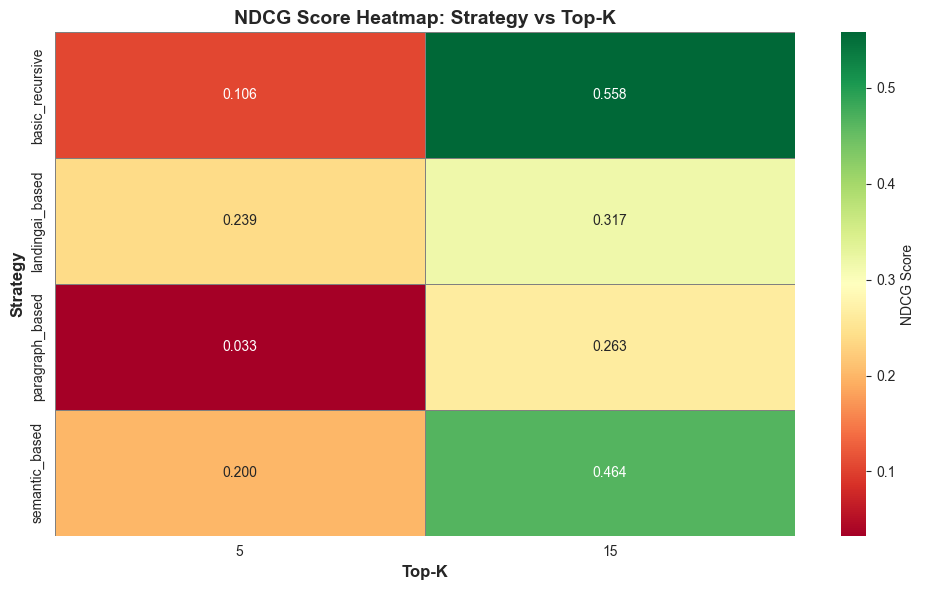

Saved: experiments/plots/heatmap_ndcg.png


In [7]:


# ============================================================================
# CELL 5: Plot 4 - Heatmap: Strategy vs Top-K (NDCG)
# ============================================================================

pivot_ndcg = df.pivot_table(values='avg_ndcg', index='strategy', columns='top_k')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_ndcg, annot=True, fmt='.3f', cmap='RdYlGn', 
            cbar_kws={'label': 'NDCG Score'},
            linewidths=0.5, linecolor='gray')
plt.title('NDCG Score Heatmap: Strategy vs Top-K', fontsize=14, fontweight='bold')
plt.xlabel('Top-K', fontsize=12, fontweight='bold')
plt.ylabel('Strategy', fontsize=12, fontweight='bold')
plt.tight_layout()
# plt.savefig('experiments/plots/heatmap_ndcg.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: experiments/plots/heatmap_ndcg.png")


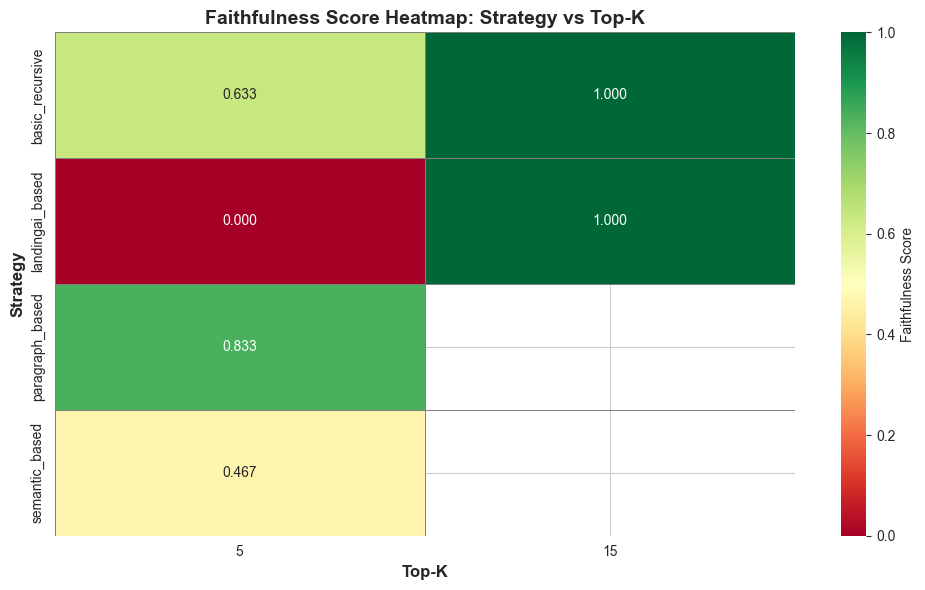

Saved: experiments/plots/heatmap_faithfulness.png


In [8]:


# ============================================================================
# CELL 6: Plot 5 - Heatmap: Strategy vs Top-K (Faithfulness)
# ============================================================================

pivot_faith = df.pivot_table(values='avg_faithfulness', index='strategy', columns='top_k')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_faith, annot=True, fmt='.3f', cmap='RdYlGn', 
            cbar_kws={'label': 'Faithfulness Score'},
            linewidths=0.5, linecolor='gray')
plt.title('Faithfulness Score Heatmap: Strategy vs Top-K', fontsize=14, fontweight='bold')
plt.xlabel('Top-K', fontsize=12, fontweight='bold')
plt.ylabel('Strategy', fontsize=12, fontweight='bold')
plt.tight_layout()
# plt.savefig('experiments/plots/heatmap_faithfulness.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: experiments/plots/heatmap_faithfulness.png")


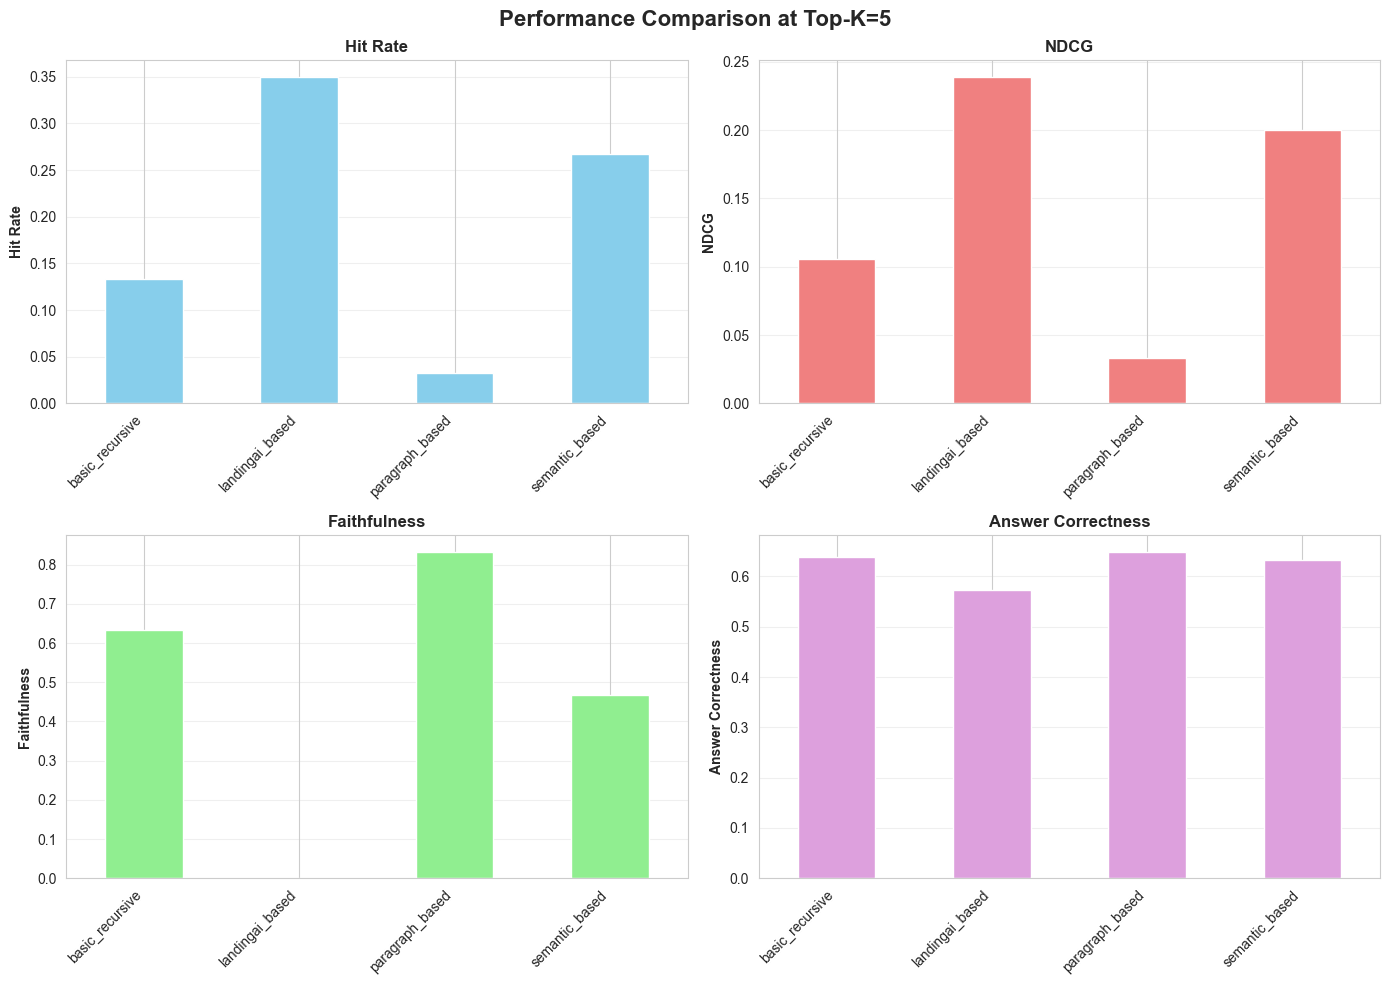

Saved: experiments/plots/comparison_k5.png


In [9]:


# ============================================================================
# CELL 7: Plot 6 - Bar Chart: Overall Performance at Top-K=5
# ============================================================================

df_k5 = df[df['top_k'] == 5].copy()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Performance Comparison at Top-K=5', fontsize=16, fontweight='bold')

# Hit Rate
ax = axes[0, 0]
df_k5.plot(x='strategy', y='hit_rate', kind='bar', ax=ax, color='skyblue', legend=False)
ax.set_ylabel('Hit Rate', fontweight='bold')
ax.set_title('Hit Rate', fontsize=12, fontweight='bold')
ax.set_xlabel('')
ax.grid(axis='y', alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# NDCG
ax = axes[0, 1]
df_k5.plot(x='strategy', y='avg_ndcg', kind='bar', ax=ax, color='lightcoral', legend=False)
ax.set_ylabel('NDCG', fontweight='bold')
ax.set_title('NDCG', fontsize=12, fontweight='bold')
ax.set_xlabel('')
ax.grid(axis='y', alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Faithfulness
ax = axes[1, 0]
df_k5.plot(x='strategy', y='avg_faithfulness', kind='bar', ax=ax, color='lightgreen', legend=False)
ax.set_ylabel('Faithfulness', fontweight='bold')
ax.set_title('Faithfulness', fontsize=12, fontweight='bold')
ax.set_xlabel('')
ax.grid(axis='y', alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Answer Correctness
ax = axes[1, 1]
df_k5.plot(x='strategy', y='avg_answer_correctness', kind='bar', ax=ax, color='plum', legend=False)
ax.set_ylabel('Answer Correctness', fontweight='bold')
ax.set_title('Answer Correctness', fontsize=12, fontweight='bold')
ax.set_xlabel('')
ax.grid(axis='y', alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
# plt.savefig('experiments/plots/comparison_k5.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: experiments/plots/comparison_k5.png")



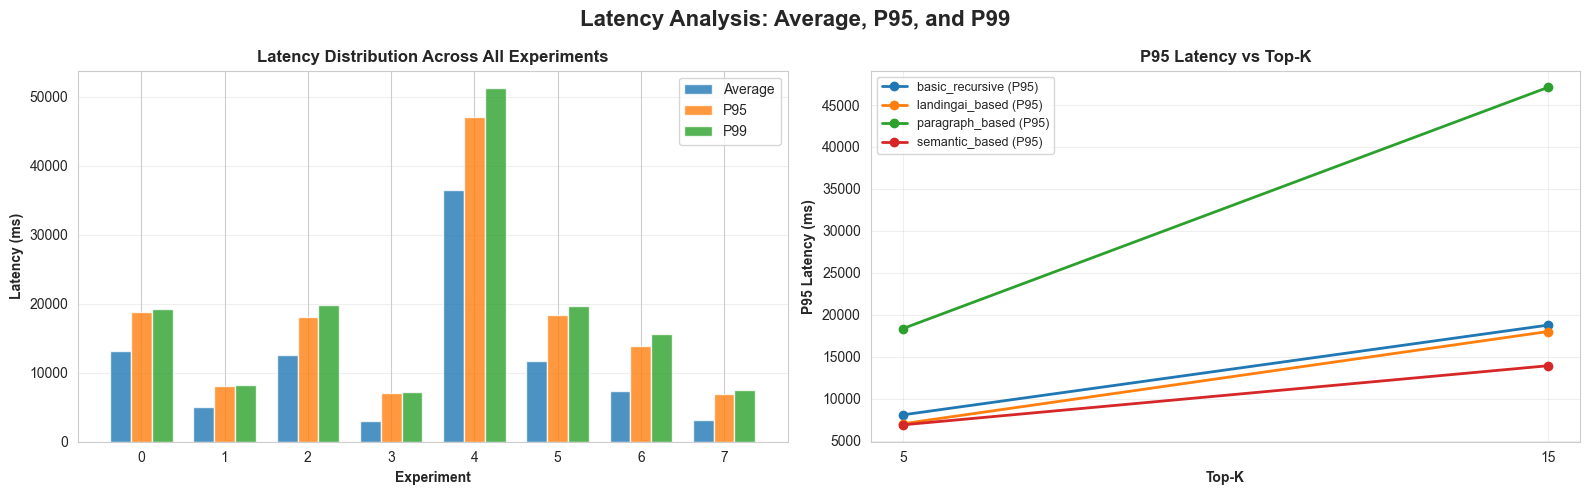

Saved: experiments/plots/latency_analysis.png


In [10]:

# ============================================================================
# CELL 8: Plot 7 - Latency Analysis (P95, P99)
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Latency Analysis: Average, P95, and P99', fontsize=16, fontweight='bold')

# Plot 1: Average vs P95 vs P99
ax = axes[0]
x = np.arange(len(df))
width = 0.25

ax.bar(x - width, df['avg_latency_ms'], width, label='Average', alpha=0.8)
ax.bar(x, df['p95_latency_ms'], width, label='P95', alpha=0.8)
ax.bar(x + width, df['p99_latency_ms'], width, label='P99', alpha=0.8)

ax.set_xlabel('Experiment', fontweight='bold')
ax.set_ylabel('Latency (ms)', fontweight='bold')
ax.set_title('Latency Distribution Across All Experiments', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Plot 2: Latency by Top-K
ax = axes[1]
for strategy in df['strategy'].unique():
    strategy_data = df[df['strategy'] == strategy].sort_values('top_k')
    ax.plot(strategy_data['top_k'], strategy_data['p95_latency_ms'], 
           marker='o', label=f'{strategy} (P95)', linewidth=2)

ax.set_xlabel('Top-K', fontweight='bold')
ax.set_ylabel('P95 Latency (ms)', fontweight='bold')
ax.set_title('P95 Latency vs Top-K', fontsize=12, fontweight='bold')
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['top_k'].unique()))

plt.tight_layout()
# plt.savefig('experiments/plots/latency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: experiments/plots/latency_analysis.png")


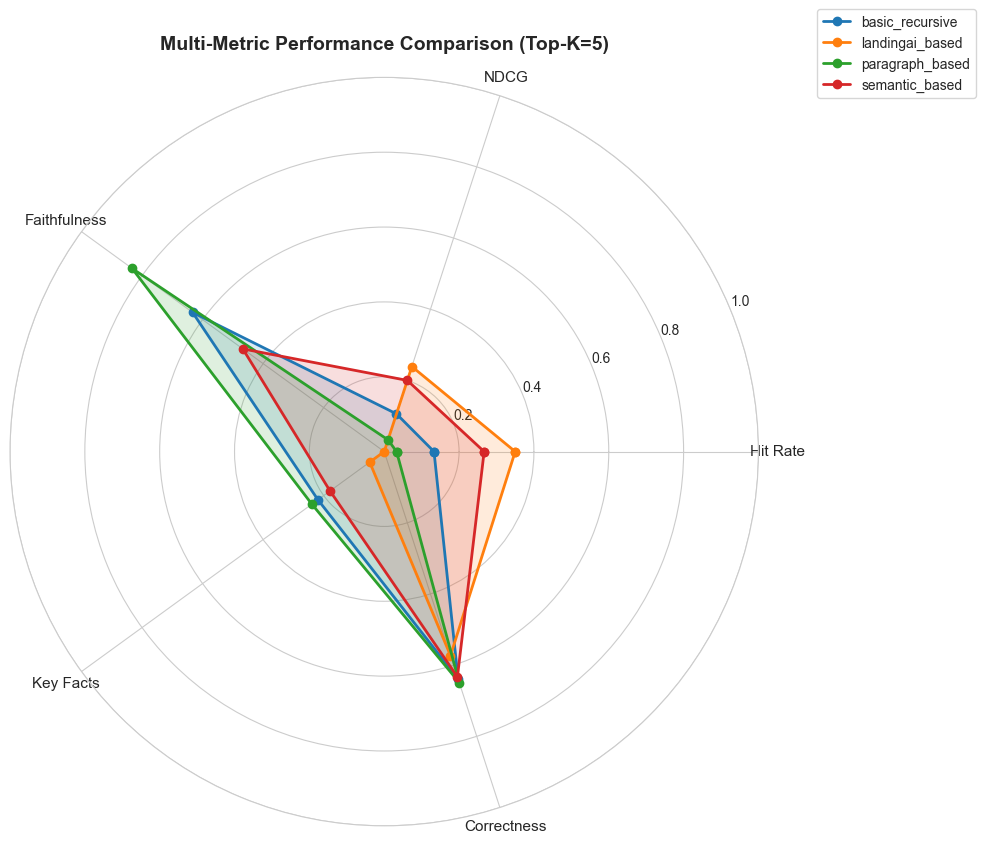

Saved: experiments/plots/radar_comparison.png


In [11]:


# ============================================================================
# CELL 9: Plot 8 - Radar Chart: Multi-Metric Comparison
# ============================================================================

from math import pi

# Select metrics for radar chart
metrics_radar = ['hit_rate', 'avg_ndcg', 'avg_faithfulness', 
                 'avg_key_facts_coverage', 'avg_answer_correctness']
metric_labels = ['Hit Rate', 'NDCG', 'Faithfulness', 'Key Facts', 'Correctness']

# Use top-k=5 for comparison
df_radar = df[df['top_k'] == 5].copy()

# Number of variables
num_vars = len(metrics_radar)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for strategy in df_radar['strategy'].unique():
    values = df_radar[df_radar['strategy'] == strategy][metrics_radar].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=strategy)
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metric_labels, size=11)
ax.set_ylim(0, 1)
ax.set_title('Multi-Metric Performance Comparison (Top-K=5)', 
             size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
# plt.savefig('experiments/plots/radar_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: experiments/plots/radar_comparison.png")


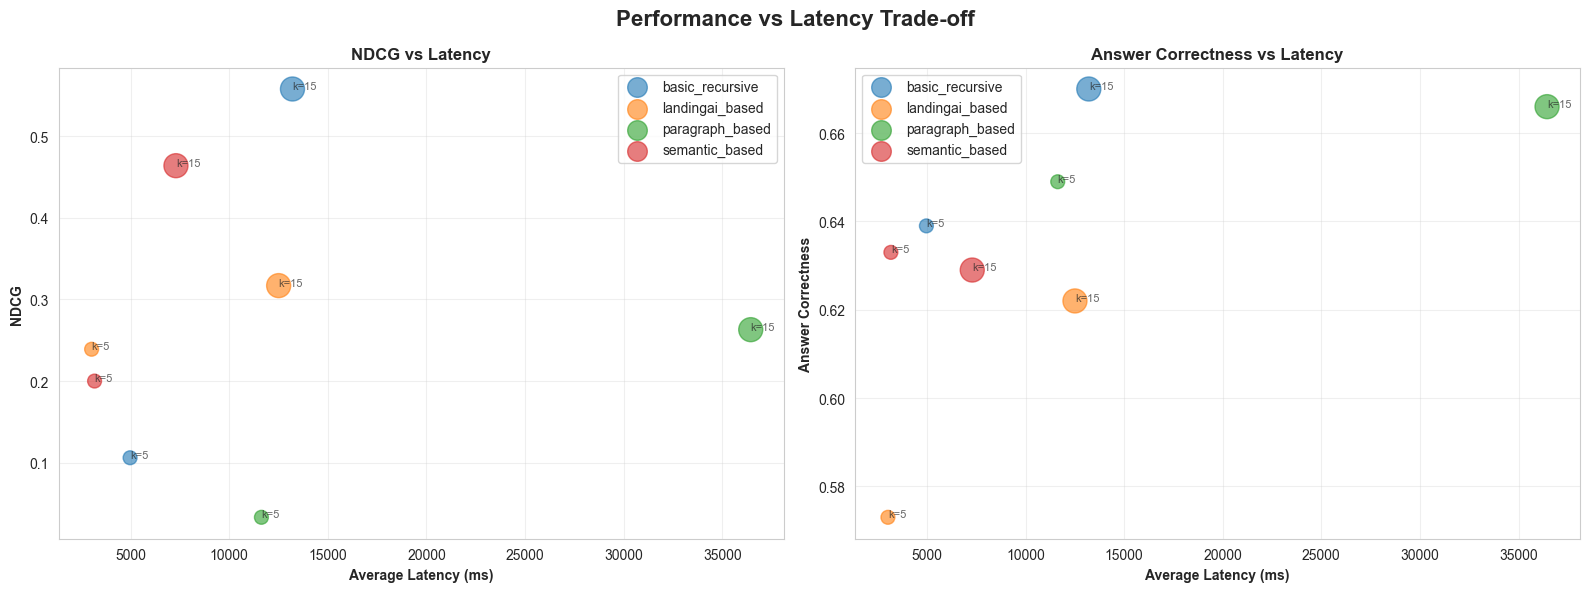

Saved: experiments/plots/performance_vs_latency.png


In [12]:


# ============================================================================
# CELL 10: Plot 9 - Scatter: Latency vs Performance Trade-off
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Performance vs Latency Trade-off', fontsize=16, fontweight='bold')

# NDCG vs Latency
ax = axes[0]
for strategy in df['strategy'].unique():
    strategy_data = df[df['strategy'] == strategy]
    ax.scatter(strategy_data['avg_latency_ms'], strategy_data['avg_ndcg'], 
              s=strategy_data['top_k']*20, alpha=0.6, label=strategy)
    
    for _, row in strategy_data.iterrows():
        ax.annotate(f"k={int(row['top_k'])}", 
                   (row['avg_latency_ms'], row['avg_ndcg']),
                   fontsize=8, alpha=0.7)

ax.set_xlabel('Average Latency (ms)', fontweight='bold')
ax.set_ylabel('NDCG', fontweight='bold')
ax.set_title('NDCG vs Latency', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# Answer Correctness vs Latency
ax = axes[1]
for strategy in df['strategy'].unique():
    strategy_data = df[df['strategy'] == strategy]
    ax.scatter(strategy_data['avg_latency_ms'], strategy_data['avg_answer_correctness'], 
              s=strategy_data['top_k']*20, alpha=0.6, label=strategy)
    
    for _, row in strategy_data.iterrows():
        ax.annotate(f"k={int(row['top_k'])}", 
                   (row['avg_latency_ms'], row['avg_answer_correctness']),
                   fontsize=8, alpha=0.7)

ax.set_xlabel('Average Latency (ms)', fontweight='bold')
ax.set_ylabel('Answer Correctness', fontweight='bold')
ax.set_title('Answer Correctness vs Latency', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('experiments/plots/performance_vs_latency.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: experiments/plots/performance_vs_latency.png")



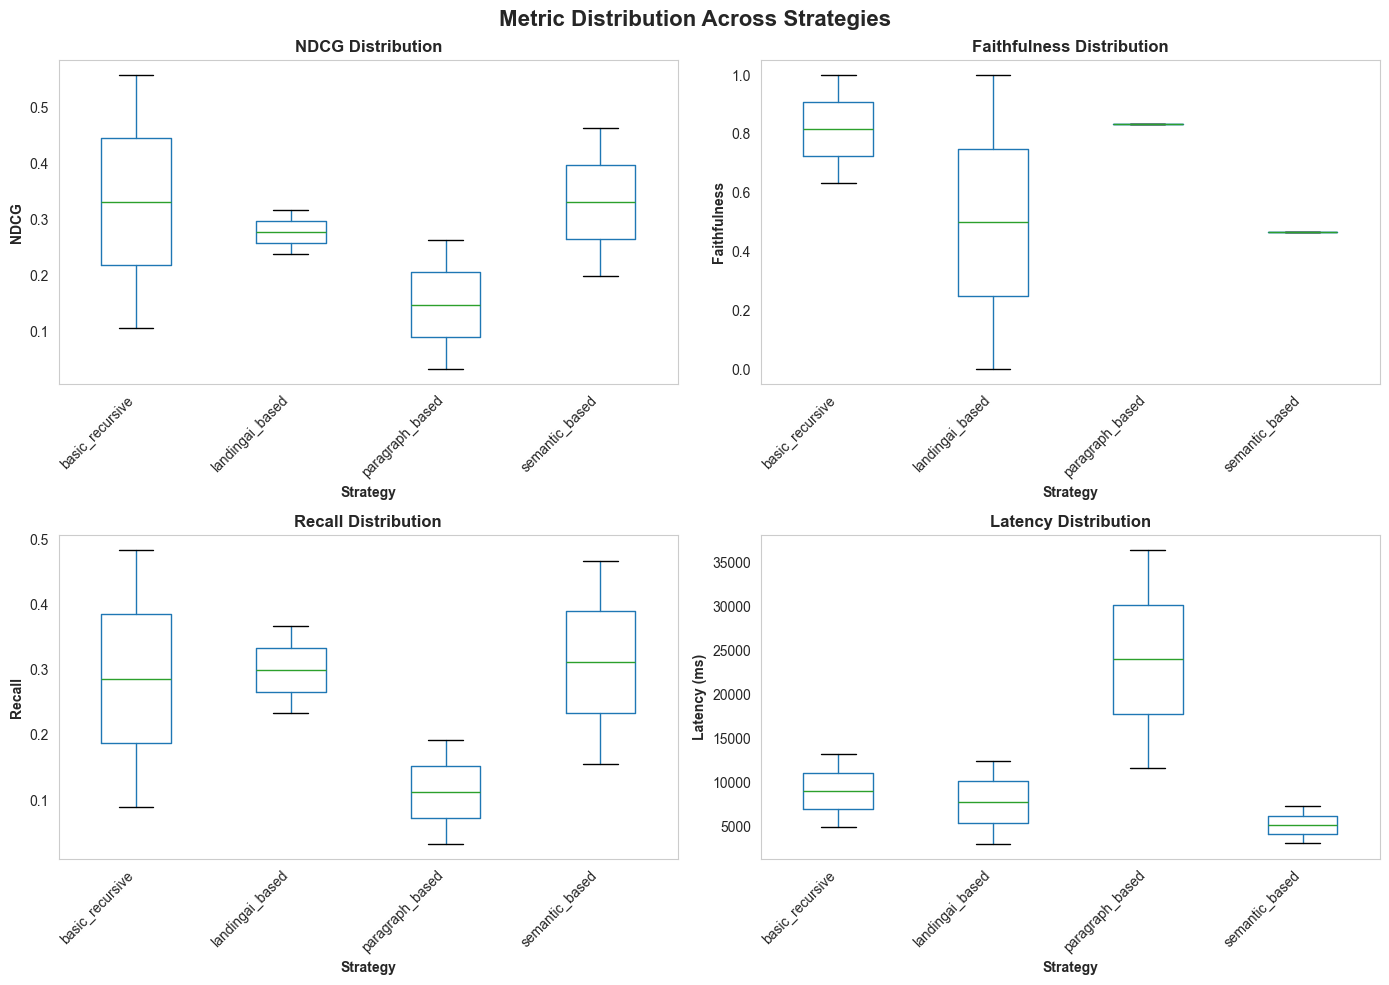

Saved: experiments/plots/metric_distributions.png


In [13]:

# ============================================================================
# CELL 11: Plot 10 - Box Plot: Metric Distribution Across Strategies
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Metric Distribution Across Strategies', fontsize=16, fontweight='bold')

# NDCG Distribution
ax = axes[0, 0]
df.boxplot(column='avg_ndcg', by='strategy', ax=ax, grid=False)
ax.set_title('NDCG Distribution', fontsize=12, fontweight='bold')
ax.set_xlabel('Strategy', fontweight='bold')
ax.set_ylabel('NDCG', fontweight='bold')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.suptitle('')

# Faithfulness Distribution
ax = axes[0, 1]
df.boxplot(column='avg_faithfulness', by='strategy', ax=ax, grid=False)
ax.set_title('Faithfulness Distribution', fontsize=12, fontweight='bold')
ax.set_xlabel('Strategy', fontweight='bold')
ax.set_ylabel('Faithfulness', fontweight='bold')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.suptitle('')

# Recall Distribution
ax = axes[1, 0]
df.boxplot(column='avg_recall', by='strategy', ax=ax, grid=False)
ax.set_title('Recall Distribution', fontsize=12, fontweight='bold')
ax.set_xlabel('Strategy', fontweight='bold')
ax.set_ylabel('Recall', fontweight='bold')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.suptitle('')

# Latency Distribution
ax = axes[1, 1]
df.boxplot(column='avg_latency_ms', by='strategy', ax=ax, grid=False)
ax.set_title('Latency Distribution', fontsize=12, fontweight='bold')
ax.set_xlabel('Strategy', fontweight='bold')
ax.set_ylabel('Latency (ms)', fontweight='bold')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.suptitle('')

fig.suptitle('Metric Distribution Across Strategies', fontsize=16, fontweight='bold')
plt.tight_layout()
# plt.savefig('experiments/plots/metric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: experiments/plots/metric_distributions.png")



In [14]:

# ============================================================================
# CELL 12: Summary - All Plots Created
# ============================================================================

print("\n" + "="*80)
print("ALL PLOTS CREATED SUCCESSFULLY")
print("="*80)
print("\nGenerated plots:")
print("  1. retriever_metrics.png - All retriever metrics by strategy and top-k")
print("  2. generator_metrics.png - All generator metrics by strategy and top-k")
print("  3. end_to_end_metrics.png - Context recall, correctness, latency, cost")
print("  4. heatmap_ndcg.png - NDCG heatmap (strategy vs top-k)")
print("  5. heatmap_faithfulness.png - Faithfulness heatmap (strategy vs top-k)")
print("  6. comparison_k5.png - Bar chart comparison at top-k=5")
print("  7. latency_analysis.png - Average, P95, P99 latency analysis")
print("  8. radar_comparison.png - Multi-metric radar chart")
print("  9. performance_vs_latency.png - Performance vs latency trade-off")
print(" 10. metric_distributions.png - Box plots of metric distributions")
print("\nAll plots saved in: experiments/plots/")
print("="*80)


ALL PLOTS CREATED SUCCESSFULLY

Generated plots:
  1. retriever_metrics.png - All retriever metrics by strategy and top-k
  2. generator_metrics.png - All generator metrics by strategy and top-k
  3. end_to_end_metrics.png - Context recall, correctness, latency, cost
  4. heatmap_ndcg.png - NDCG heatmap (strategy vs top-k)
  5. heatmap_faithfulness.png - Faithfulness heatmap (strategy vs top-k)
  6. comparison_k5.png - Bar chart comparison at top-k=5
  7. latency_analysis.png - Average, P95, P99 latency analysis
  8. radar_comparison.png - Multi-metric radar chart
  9. performance_vs_latency.png - Performance vs latency trade-off
 10. metric_distributions.png - Box plots of metric distributions

All plots saved in: experiments/plots/
